# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [136]:
# Libraries
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd

import matplotlib.pyplot as plt

import math

# makes sure charts appear in the notebook rather than a popup window
%matplotlib inline

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [81]:
# your code here
employees = pd.read_csv('Employee.csv')

In [50]:

employees.head(5)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [51]:
# Method 1
# your code here
employees.groupby(['Department'])['Salary'].mean()


Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [52]:
# Method 2
# your code here
employees.pivot_table(values='Salary', index='Department', aggfunc='mean')



,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [53]:
# your code here
employees.pivot_table(values='Salary', index=['Department','Title'], aggfunc=np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [54]:
# your code here
employees.pivot_table(values=['Years','Salary'], index=['Title'], aggfunc=np.mean)

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [55]:
# your code here
employees.pivot_table(values=['Salary', 'Name'], index=['Department', 'Title'], aggfunc={'Salary': np.mean, 'Name': 'count'})


Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [59]:
# your code here
employees.pivot_table(values=['Salary'], index=['Department', 'Title'], aggfunc=('median', 'min', 'max', 'std'))

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70       NaN
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70       NaN
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60       NaN
Sales      associate     55   55.0  55  0.000000

In [ ]:
"""
your commments here
Nan wheb only 1 elmt
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [62]:
# your code here
employees.pivot_table(values=['Salary'], index=['Department', 'Title'], aggfunc=('median', 'min', 'max', 'std')).replace(np.nan, 0, regex=False)

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [64]:
# your code here
employees.pivot_table(values=['Salary', 'Name'], index=['Department'], aggfunc={'Salary': 'sum', 'Name': 'count'})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [82]:
# your code here
employees.pivot_table(values=['Years','Salary'], index=['Department', 'Title'], aggfunc={'Years': 'sum', 'Salary': np.mean})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [85]:
# your code here
def drop_max_sal(salaries):
    max_sal = salaries.max()
    return salaries.loc[salaries < max_sal].mean()
employees.pivot_table(values='Salary', index='Department', aggfunc=drop_max_sal)



,Salary
Department,
HR,32.500000
IT,41.666667


# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [89]:
# your code here
fitbit = pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [90]:
# your code here
fitbit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [105]:
# your code here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [106]:
import matplotlib.pyplot as plt;

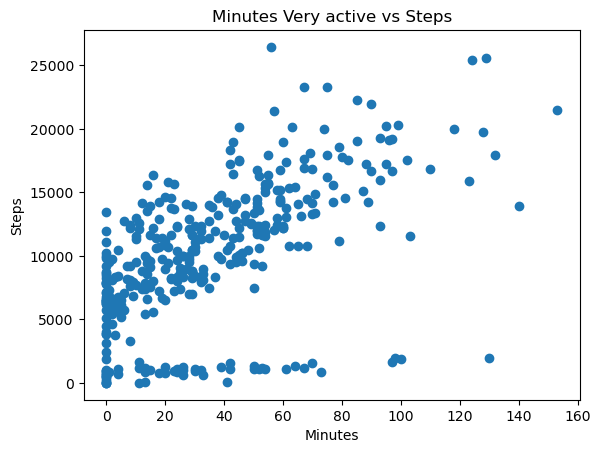

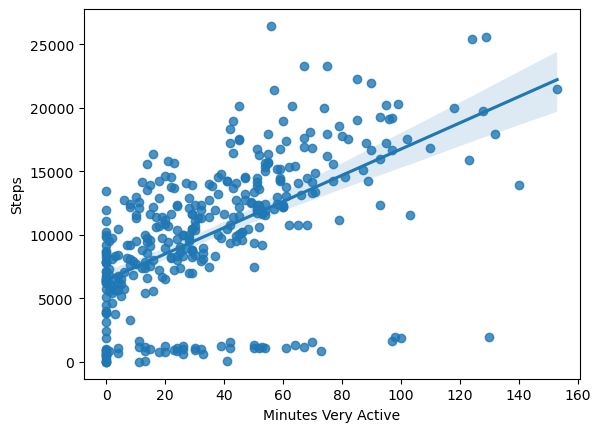

In [112]:
import seaborn as sns

plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.title("Minutes Very active vs Steps")
plt.xlabel("Minutes")
plt.ylabel("Steps")
plt.show()

sns.regplot(data=fitbit, x='Minutes Very Active', y='Steps')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
correlated
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [108]:
# your code here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

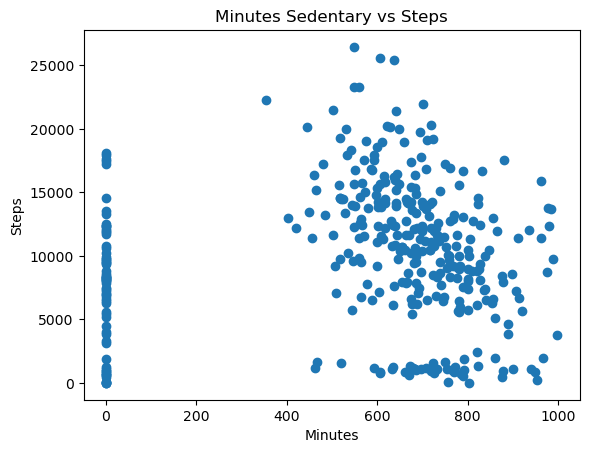

<AxesSubplot:xlabel='Minutes Sedentary', ylabel='Steps'>

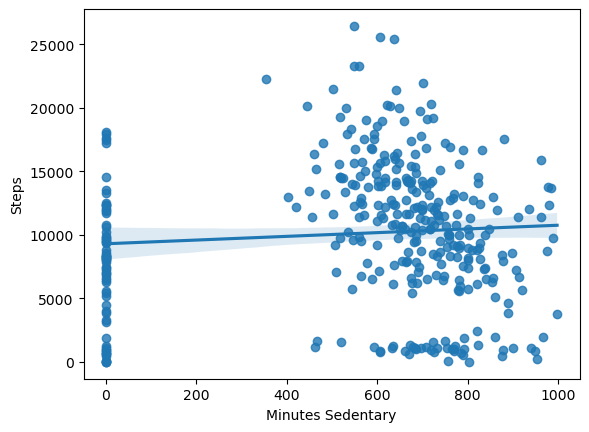

In [114]:
# your code here
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.title("Minutes Sedentary vs Steps")
plt.xlabel("Minutes")
plt.ylabel("Steps")
plt.show()
sns.regplot(data=fitbit, x='Minutes Sedentary', y='Steps')

In [ ]:
"""
less correlated
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [110]:
# your code here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])


0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

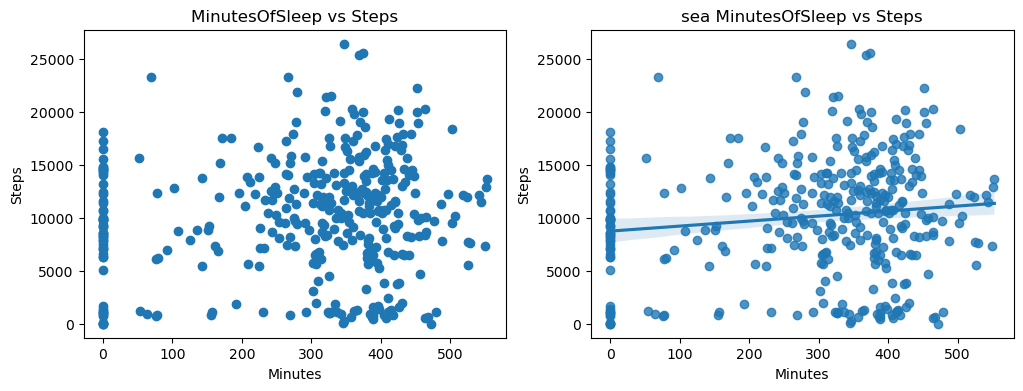

In [169]:
# your code here
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax1.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
ax1.set(title="MinutesOfSleep vs Steps", xlabel="Minutes", ylabel="Steps")



ax2 = sns.regplot(data=fitbit, x='MinutesOfSleep', y='Steps')
ax2.set(title="sea MinutesOfSleep vs Steps", xlabel="Minutes", ylabel="Steps")

plt.show()

In [ ]:
"""
low correlation
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [171]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


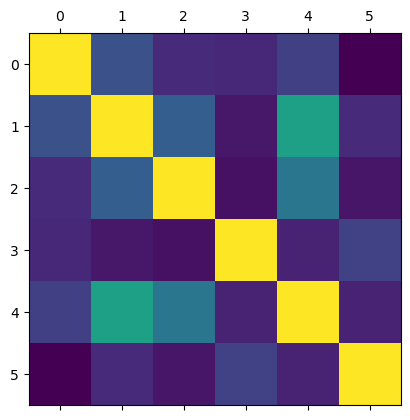

In [178]:
# your code here

cor_fit = fitbit[columns].corr()
display(cor_fit)
plt.matshow(cor_fit);

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [182]:
# your code here
fitbit[columns].corr()['Steps'].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [185]:
# your code here
time_grades = pd.read_csv('Time_grades.csv')
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


In [186]:
time_grades.describe()

,Study time,Grade
count,15.000000,15.000000
mean,9.000000,5.933333
std,5.182388,2.711527
min,2.000000,1.000000
25%,5.500000,3.500000
50%,8.000000,7.000000
75%,11.500000,8.000000
max,20.000000,9.000000


#### Show visually the frequency distribution of the `time_grades` dataset.

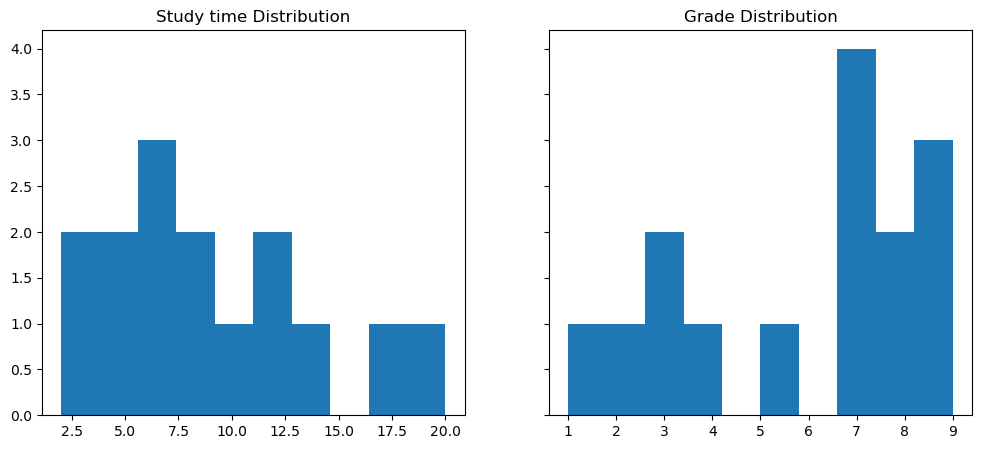

In [197]:
# your code here
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,5))
ax1.hist(time_grades['Study time'],bins=10)
ax1.set_title('Study time Distribution')
ax2.hist(time_grades['Grade'],bins=10) 
ax2.set_title('Grade Distribution')
plt.show()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [218]:
# your code here
print('Pearson correllation:', time_grades[['Study time']].corrwith(time_grades['Grade'],method='pearson'))
print('Spearman correllation:',time_grades[['Study time']].corrwith(time_grades['Grade'],method='spearman'))

Pearson correllation: Study time    0.798046
dtype: float64
Spearman correllation: Study time    0.819659
dtype: float64


In [ ]:
"""
Spearman > Pearson
but pearson should be used
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

[Text(0.5, 1.0, 'seaborn Study time vs Grade'),
 Text(0.5, 0, 'Minutes'),
 Text(0, 0.5, 'Grade')]

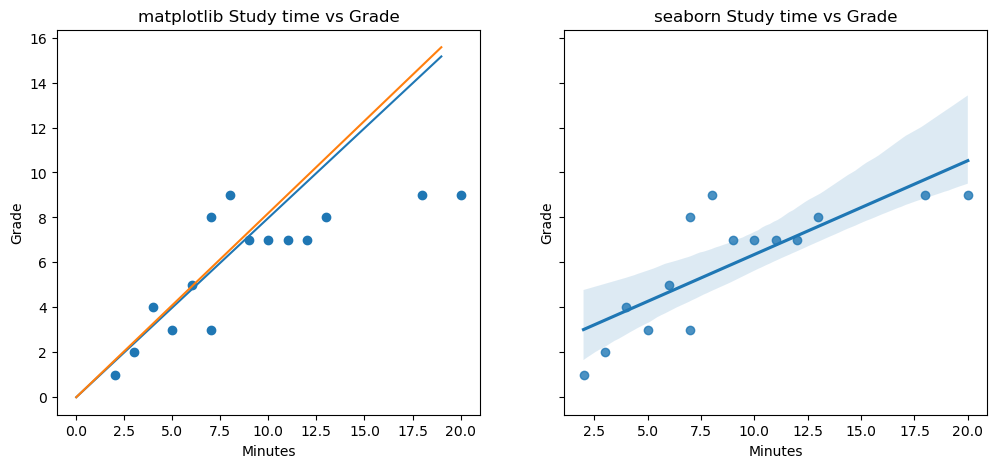

In [217]:
# your code here
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,5))
ax1.scatter(time_grades['Study time'], time_grades['Grade'])
ax1.set(title="matplotlib Study time vs Grade", xlabel="Minutes", ylabel="Grade")
x = np.array(range(20))
ax1.plot(x, 0.798046 * x)
ax1.plot(x, 0.819659 * x)

ax2 = sns.regplot(data=time_grades, x='Study time', y='Grade')
ax2.set(title="seaborn Study time vs Grade", xlabel="Minutes", ylabel="Grade")

In [ ]:
"""
your commments here
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8

"""